# Cnn on Fashion-Mnist DataSet 

In [2]:
import os

ROOT = '/content/drive/MyDrive/Google Collab Files/Fashion_Mnist'
os.chdir(ROOT)
assert ROOT == os.getcwd()

In [4]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
print(f'The Shape of X_train is: {X_train.shape}, \nThe Shape of Y_train is: {y_train.shape}')

The Shape of X_train is: (60000, 28, 28), 
The Shape of Y_train is: (60000,)


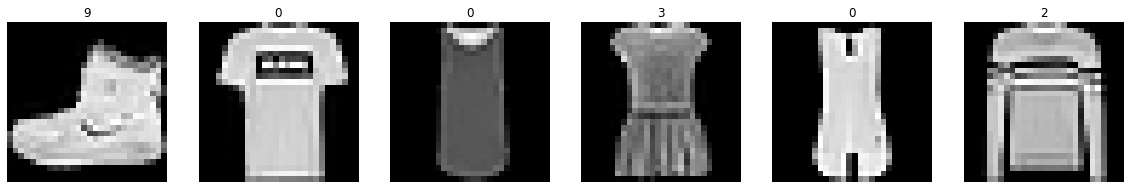

In [7]:
#Ploting First training image
fig = plt.figure(figsize=(20, 20))
for i in range(6):
  ax = fig.add_subplot(1, 6, i+1)
  ax.imshow(X_train[i], cmap='gray')
  ax.set_title(y_train[i])
  ax.set_axis_off()

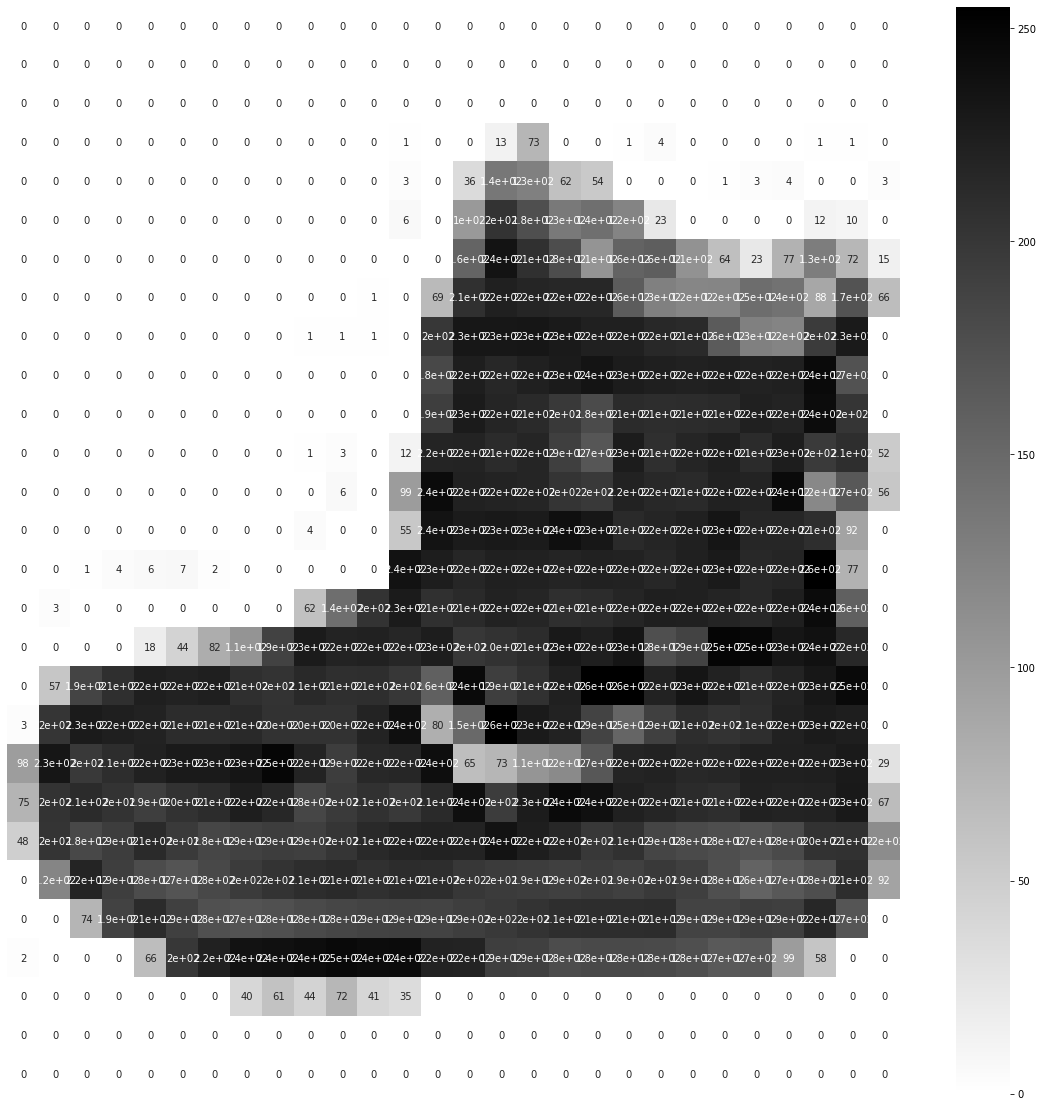

In [8]:
#visualise the image in more detail
plt.figure(figsize=(20, 20))
plt.axis('off')
sns.heatmap(X_train[0], cmap='binary', annot=True)

In [9]:
#scaling the data between 0 to 1 by dividing it by 255 as its a a unsigned integer 2^8
#scaling the data between 0 to 1 by dividing it by 255 as its a a unsigned integer 2^8
X_valid, X_train = X_train[:5000] / 255, X_train[5000:] / 255

y_valid, y_train = y_train[:5000], y_train[5000:]

X_test = X_test / 255

In [10]:
#Reshaping the training set to fil cnn & input size
img_rows, img_cols = 28, 28 #input image size

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 1)

X_valid.shape

(5000, 28, 28, 1)

In [11]:
from keras.utils import np_utils

num_classes = 10 
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_valid = np_utils.to_categorical(y_valid, num_classes)

# print first ten (one-hot) training labels
#print('One-hot labels:')
#print(y_train[:10])

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

Integer-valued labels:
[4 0 7 9 9 9 4 4 3 4]
(55000, 10)
(10000, 10)
(5000, 10)


Model Architecture 

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

model = Sequential()

#conv_1 convo layer with relu activation and depth = 32 kernals
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))

#pool_1 down sizing to choose best params
model.add(MaxPooling2D(pool_size=(2, 2)))

#convo_2 convo layer with relu activation and depth = 64 kernals
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))

#pool_2 down sizing 
model.add(MaxPooling2D(pool_size=(2, 2)))

#convo_3 convo layer with relu activation and depth = 124 kernals
model.add(Conv2D(filters=124, kernel_size=(3, 3), activation='relu', padding='same'))

#pool_3 down sizing 
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten since too many dimensions, we only want a classification output
model.add(Flatten())

# FC_1: fully connected to get all relevant data
model.add(Dense(64, activation='relu'))

# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 124)         71548     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 124)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1116)              0

Compile the model

In [13]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(55000, 28, 28, 1)
(55000, 10)
(5000, 28, 28, 1)
(5000, 10)


Train the model

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_valid, y_valid), callbacks=[checkpointer], verbose=True, shuffle=True)

Epoch 1/20
860/860 [==============================] - 36s 5ms/step - loss: 0.5062 - accuracy: 0.8151 - val_loss: 0.3347 - val_accuracy: 0.8738

Epoch 00001: val_loss improved from inf to 0.33467, saving model to model.weights.best.hdf5
Epoch 2/20
860/860 [==============================] - 4s 4ms/step - loss: 0.3072 - accuracy: 0.8871 - val_loss: 0.2696 - val_accuracy: 0.9032

Epoch 00002: val_loss improved from 0.33467 to 0.26960, saving model to model.weights.best.hdf5
Epoch 3/20
860/860 [==============================] - 4s 5ms/step - loss: 0.2586 - accuracy: 0.9051 - val_loss: 0.2472 - val_accuracy: 0.9084

Epoch 00003: val_loss improved from 0.26960 to 0.24725, saving model to model.weights.best.hdf5
Epoch 4/20
860/860 [==============================] - 4s 4ms/step - loss: 0.2265 - accuracy: 0.9168 - val_loss: 0.2349 - val_accuracy: 0.9156

Epoch 00004: val_loss improved from 0.24725 to 0.23493, saving model to model.weights.best.hdf5
Epoch 5/20
860/860 [===========================

Calculate accuracy on the Test Set 

In [16]:
model.load_weights('model.weights.best.hdf5')
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = score[1] * 100

# print test accuracy
print(f'Test accuracy: %.4f%% : {accuracy}')

Test accuracy: %.4f%% : 91.68999791145325


In [18]:
X_new = X_test[:4]
y_prob = model.predict(X_new)

y_pred = np.argmax(y_prob, axis=-1)
y_pred

array([9, 2, 1, 1])

In [26]:
[np.where(r==1)[0][0] for r in y_test_new] # convertion one hot encoded value into integer
#our model predicted the out put correctly

[9, 2, 1, 1]